In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unemployment-in-india/Unemployment_Rate_upto_11_2020.csv
/kaggle/input/unemployment-in-india/Unemployment in India.csv


In [2]:
!pip install numpy

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
import warnings 
warnings.simplefilter('ignore')

In [5]:
# dfRate=pd.read_csv('/kaggle/input/unemployment-in-india/Unemployment_Rate_upto_11_2020.csv')

In [6]:

dfIn=pd.read_csv('/kaggle/input/unemployment-in-india/Unemployment in India.csv')
dfIn.tail()
dfIn.dropna(how='all',inplace=True)


In [7]:
dfIn.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [8]:
# dfRate.tail()

In [9]:
# dfRate.isna().sum()

In [10]:
# dfRate[['Region.1','longitude','latitude']].drop_duplicates()

In [11]:
df=dfIn.copy()

In [12]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [13]:
df.columns=df.columns.str.strip()

In [14]:
df.Frequency.unique()

array([' Monthly', 'Monthly'], dtype=object)

In [15]:
df.Frequency=df.Frequency.str.strip()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [17]:
df.Frequency.unique()

array(['Monthly'], dtype=object)

In [18]:
df.Date=pd.to_datetime(df.Date)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB


In [20]:
df.drop('Frequency',axis=1,inplace=True)## as frequency has no unique value we will drop Frequency

In [21]:
df.Area.unique()

array(['Rural', 'Urban'], dtype=object)

### we see that df has 2 value we has to perform encoding on it but les see other feature first


In [22]:
df.Region.unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Chandigarh'],
      dtype=object)

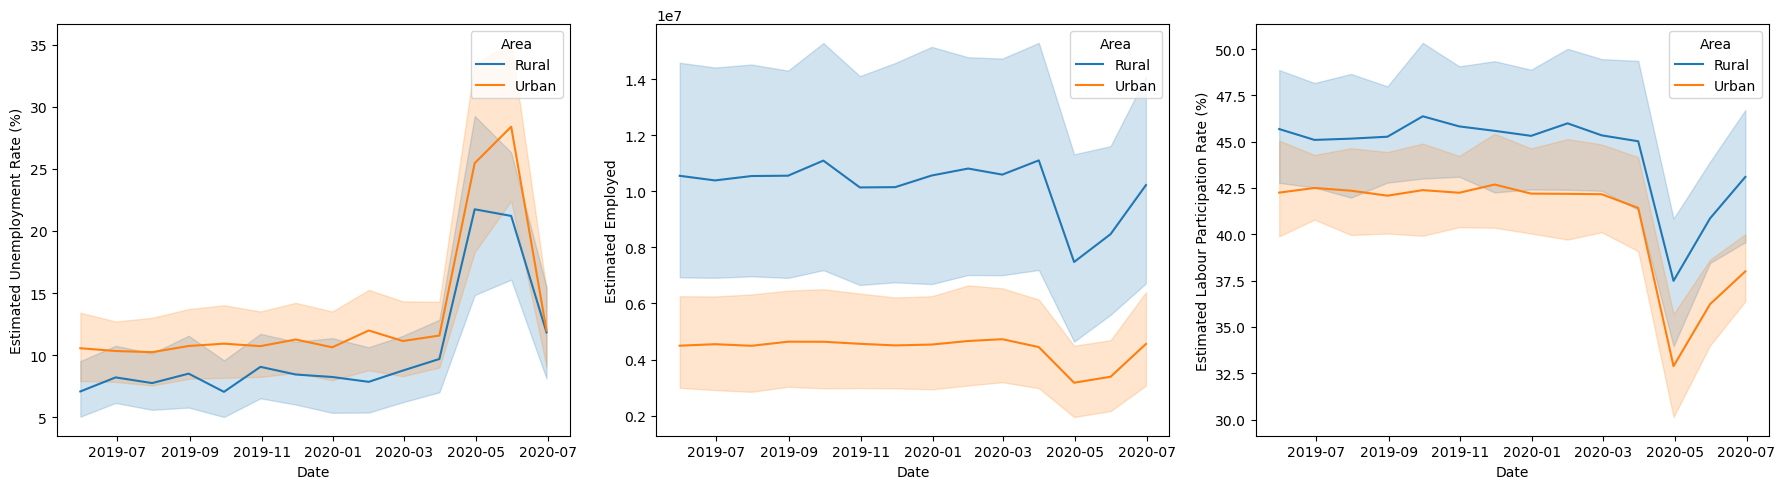

In [23]:
plt.figure(figsize=(18,5))
plt.subplot(1, 3, 1)
sns.lineplot(x=df.Date,y=df['Estimated Unemployment Rate (%)'],hue=df.Area)
plt.subplot(1, 3, 2)
sns.lineplot(x=df.Date,y=df['Estimated Employed'],hue=df.Area)
plt.subplot(1, 3, 3)
sns.lineplot(x=df.Date,y=df['Estimated Labour Participation Rate (%)'],hue=df.Area)
plt.tight_layout()


From above we observe
- unemployment increase more in urban area then in rural areas
- even when unemployment decrease in 2020-05 to 2020-06 urban area has increase in unemployment rate
- Unemployment rate is inversely dependent on employment 


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Estimated Unemployment Rate (%)          740 non-null    float64       
 3   Estimated Employed                       740 non-null    float64       
 4   Estimated Labour Participation Rate (%)  740 non-null    float64       
 5   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 40.5+ KB


In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Area=le.fit_transform(df.Area)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Estimated Unemployment Rate (%)          740 non-null    float64       
 3   Estimated Employed                       740 non-null    float64       
 4   Estimated Labour Participation Rate (%)  740 non-null    float64       
 5   Area                                     740 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 40.5+ KB


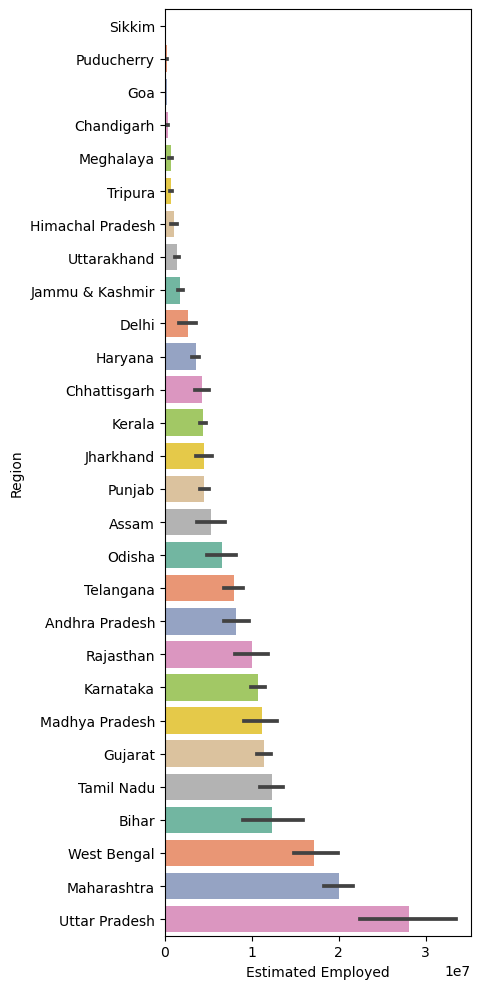

In [27]:
plt.figure(figsize=(5,10))
sns.barplot(data=df, y='Region', x='Estimated Employed',palette='Set2',order=df.groupby('Region')['Estimated Employed'].mean().sort_values().index)  
plt.tight_layout()


Here we observe most no. of unemployment is seen in UP and Maharastra
